<a href="https://colab.research.google.com/github/kity1015/29april/blob/main/InWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

import io
import pickle
sns.set_style('darkgrid')

In [6]:
data_path='/content/X_bp.xlsx'
models_path = '/content/X_nup.xlsx'

In [2]:
#@title Считываем файлы Excel в pandas DataFrame
df_bp = pd.read_excel('/content/X_bp.xlsx', index_col = 'Unnamed: 0')
df_nup = pd.read_excel('/content/X_nup.xlsx', index_col = 'Unnamed: 0')
!ls
     

sample_data  X_bp1.csv	X_bp.csv  X_bp.xlsx  X_nup.csv	X_nup.xlsx


In [8]:
# Загружаем данные из файла X_bp
X_bp = pd.read_excel('X_bp.xlsx',index_col=0)
X_bp.shape

(1023, 10)

In [9]:
# Загужаем данные из файла X_nup
X_nup = pd.read_excel('X_nup.xlsx',index_col=0)
X_nup.shape

(1040, 3)

In [10]:
# Столбцы (признаки) из файла X_bp
list(X_bp)

['Соотношение матрица-наполнитель',
 'Плотность, кг/м3',
 'модуль упругости, ГПа',
 'Количество отвердителя, м.%',
 'Содержание эпоксидных групп,%_2',
 'Температура вспышки, С_2',
 'Поверхностная плотность, г/м2',
 'Модуль упругости при растяжении, ГПа',
 'Прочность при растяжении, МПа',
 'Потребление смолы, г/м2']

In [12]:
df = X_bp.join(X_nup)


In [13]:
df


Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [15]:
df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                     2466.922843               218.423144   
std                       485.628006                59.735931   
min                      1036.856605                33.803026   
25%                      2135.850448               179.627520   
50%                      2459.524526               219.198882   
75%                      2767.193119               257.481724   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean            44.252199     6.899222          57.153929  
std             45.015793     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%             90.000000     8.586293          64.944961  
max             90.000000    14.440522         103.988901

In [16]:
# Пропуски
df.isna().sum().sort_values()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [17]:
# Уникальные значения в столбцах
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

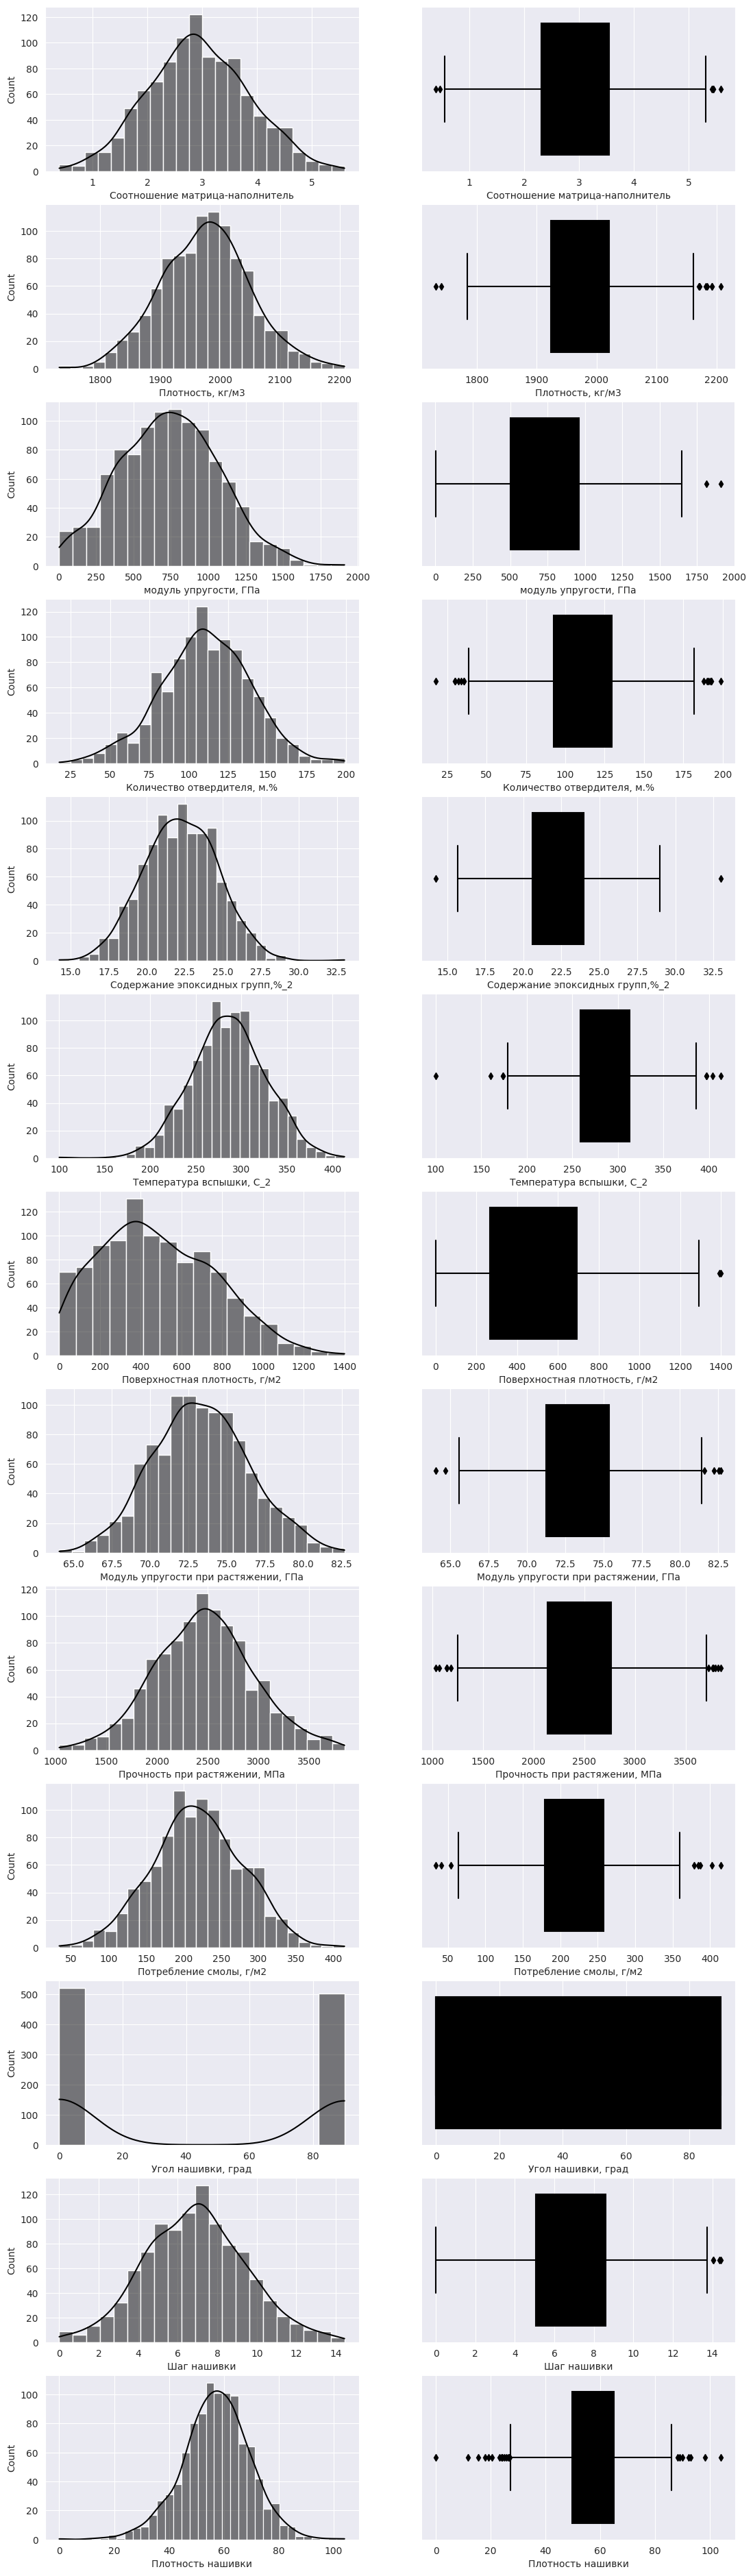

In [22]:
# Гистограммы и "ящики с усами"
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
colour = [  "black" ]
for k, column in enumerate(df.columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0],color = colour[k%len(colour)])
    sns.boxplot(data=df, x=column, ax=axes[k, 1], color = colour[k%len(colour)])
plt.show()

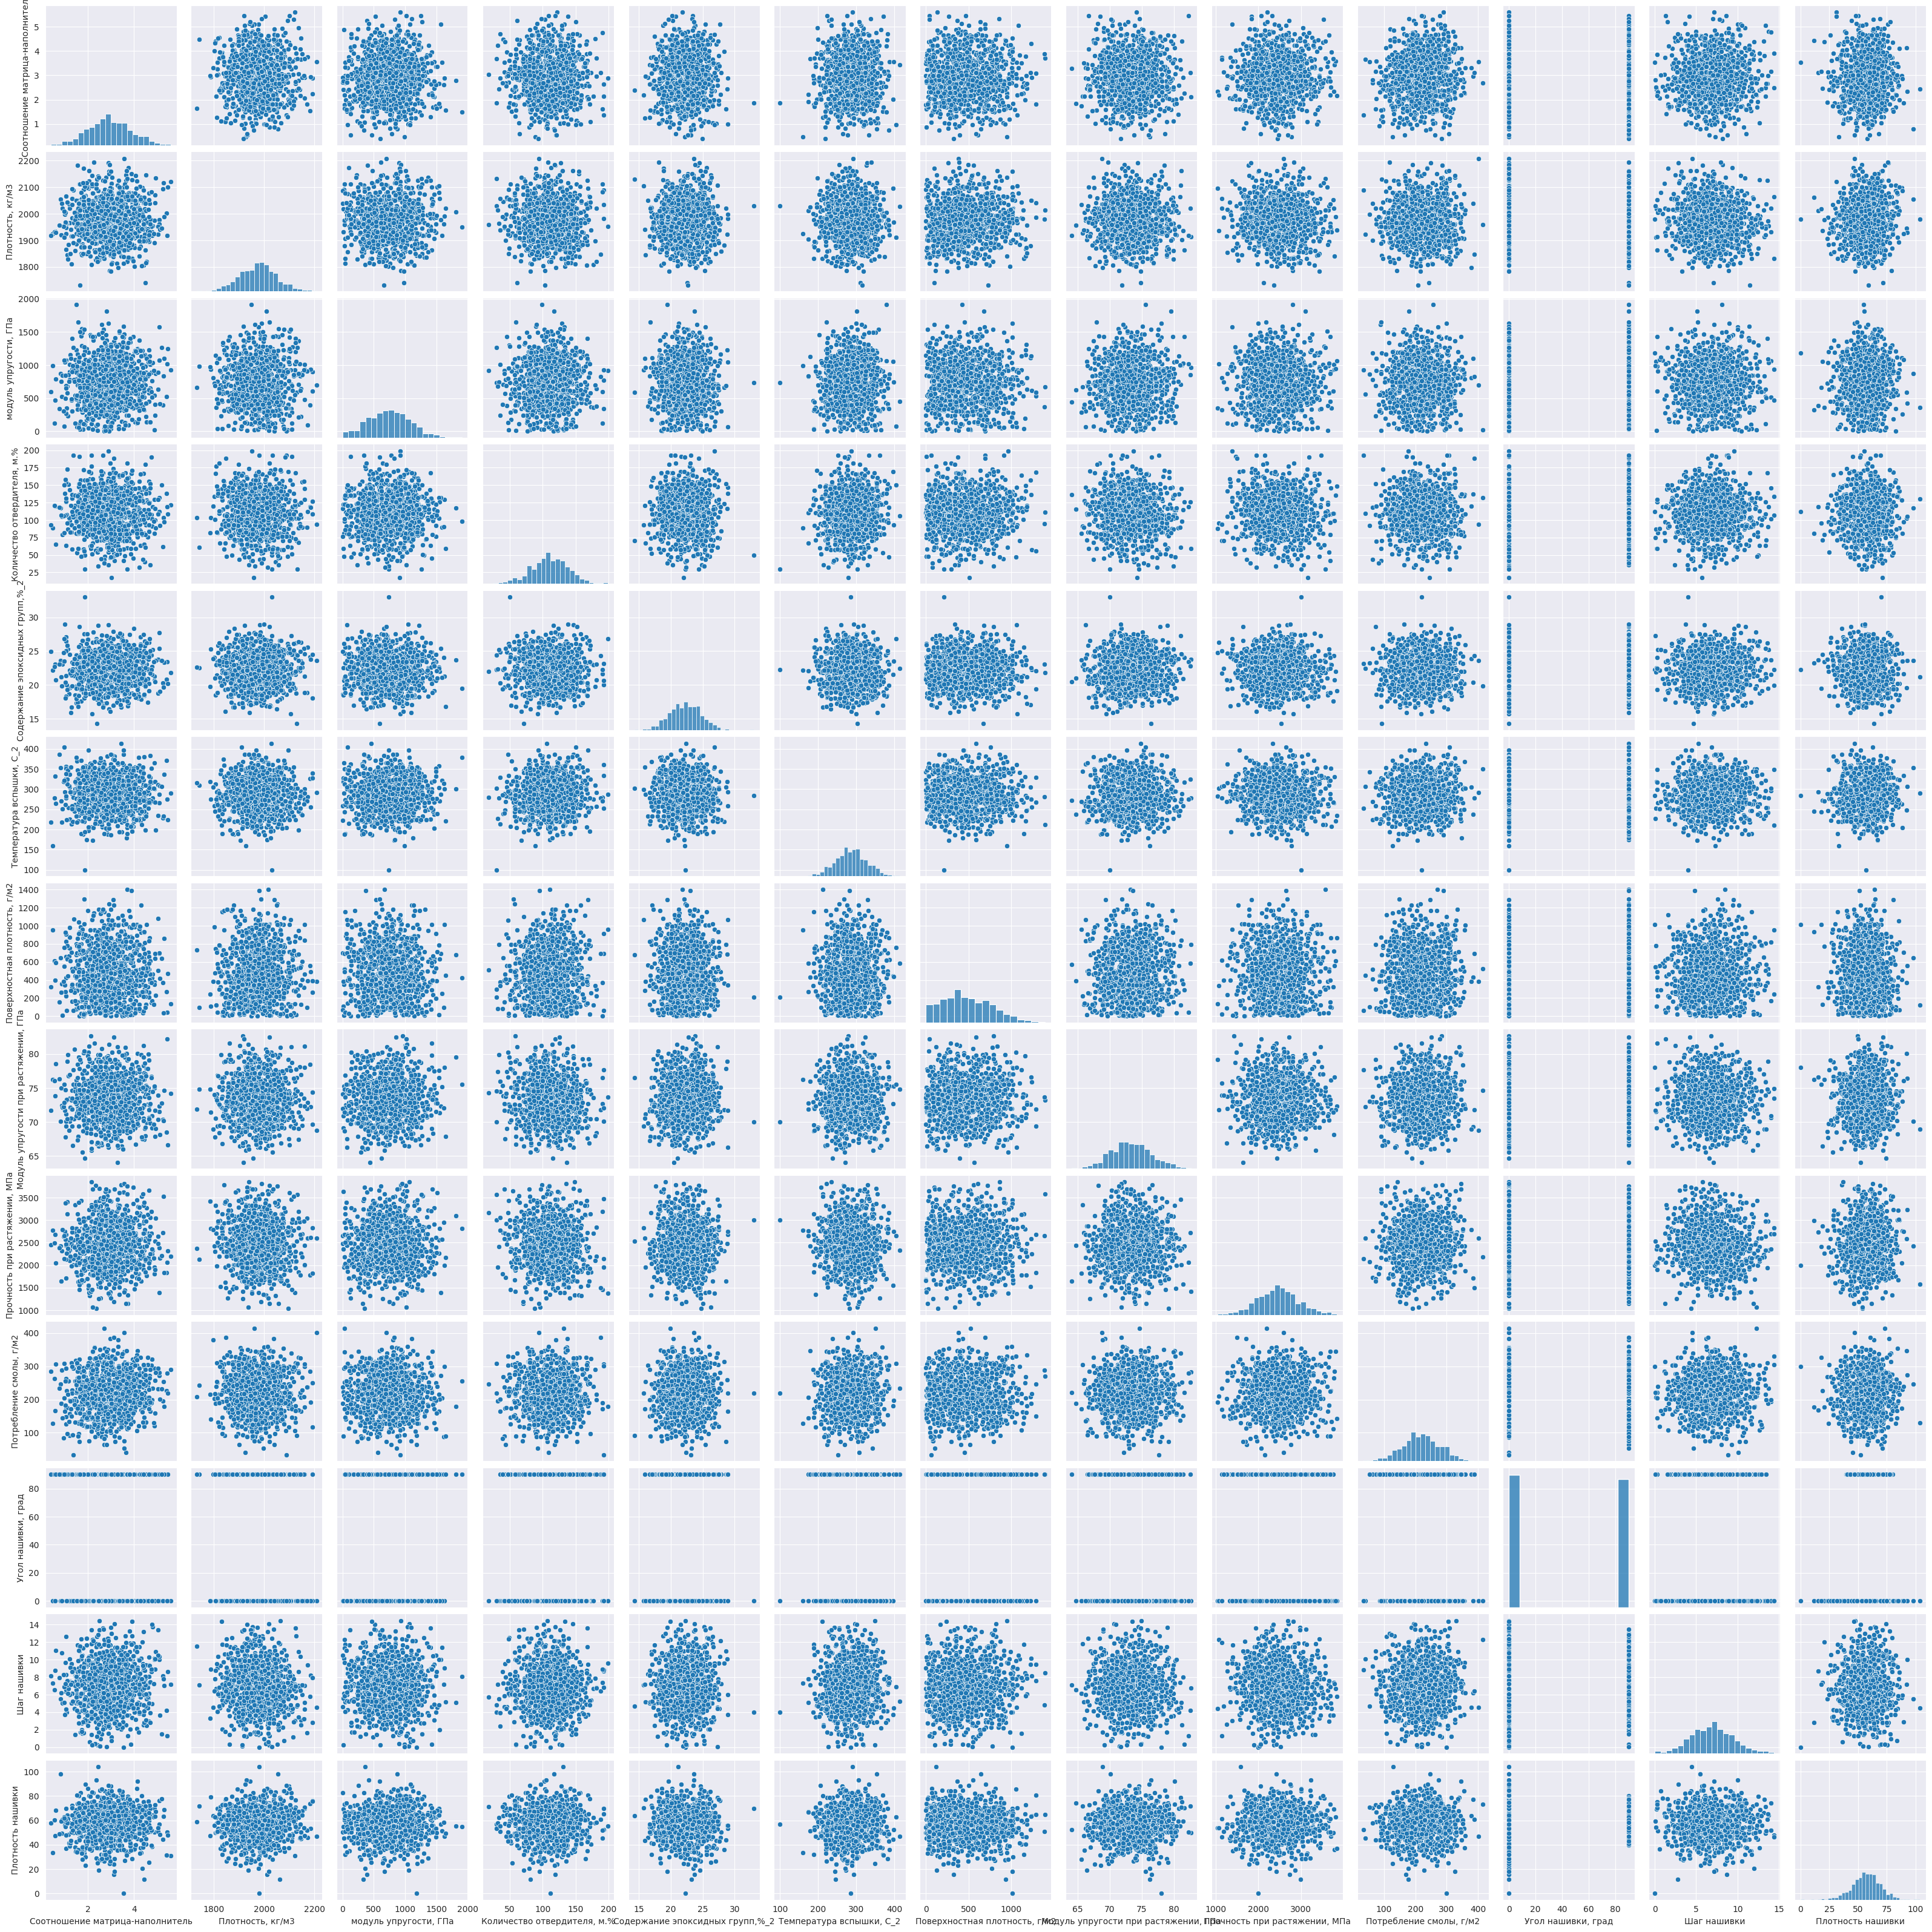

In [24]:
# попарные графики рассеяния точек
sns.pairplot(df);
colour = [  "black" ]

In [25]:
# Удаляем выбросы методом z-оценки
# Находим абсолютное значение z-балла для каждого наблюдения
z = np.abs(stats.zscore(df))
#сохраняем в df3 только строки со всеми z-баллами, меньшими абсолютного значения 3
df3 = df[(z<3).all(axis=1)]
df3.shape

(999, 13)

In [26]:
df3.to_excel(data_path + 'data3_cleaned.xlsx')

In [27]:
std_scaler = StandardScaler()
df_std = std_scaler.fit_transform(np.array(df3)) 

In [28]:
df_std[:1]

array([[-1.18888933e+00,  7.47809295e-01,  8.75366921e-04,
        -2.18808048e+00,  6.35993028e-01, -3.35381328e-02,
        -9.71213357e-01, -1.06746730e+00,  1.10374226e+00,
         3.07429778e-02, -9.93017371e-01, -1.13800811e+00,
         2.29337005e-01]])

In [29]:
df4 = pd.DataFrame(data = df_std, columns=df3.columns)
df4.to_excel(data_path + 'data4_std.xlsx')
from joblib import dump, load
dump(std_scaler,'scaler_df.joblin')

['scaler_df.joblin']

In [30]:
df4.describe().style.format(precision=4)

<Axes: >

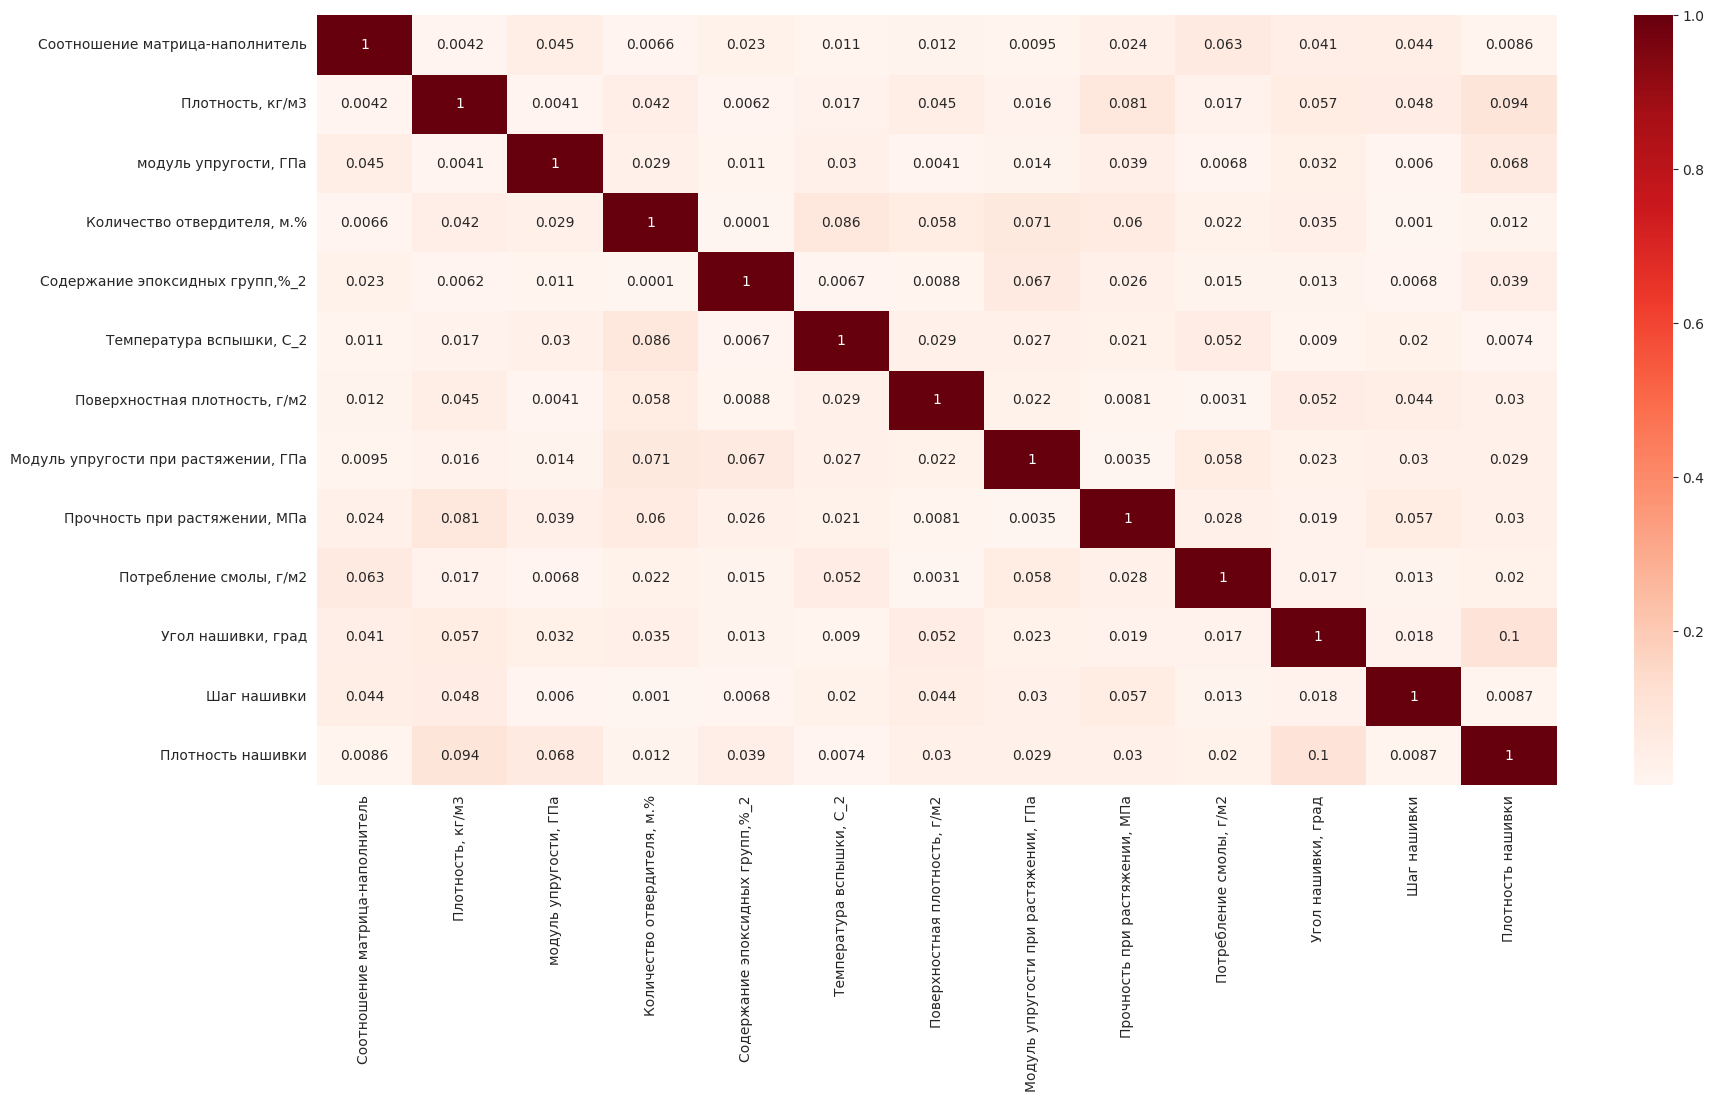

In [33]:

#@title Тепловая карта корреляции
plt.figure(figsize=(20, 10))
sns.heatmap(df4.corr().abs(), cmap='Reds', annot = True)

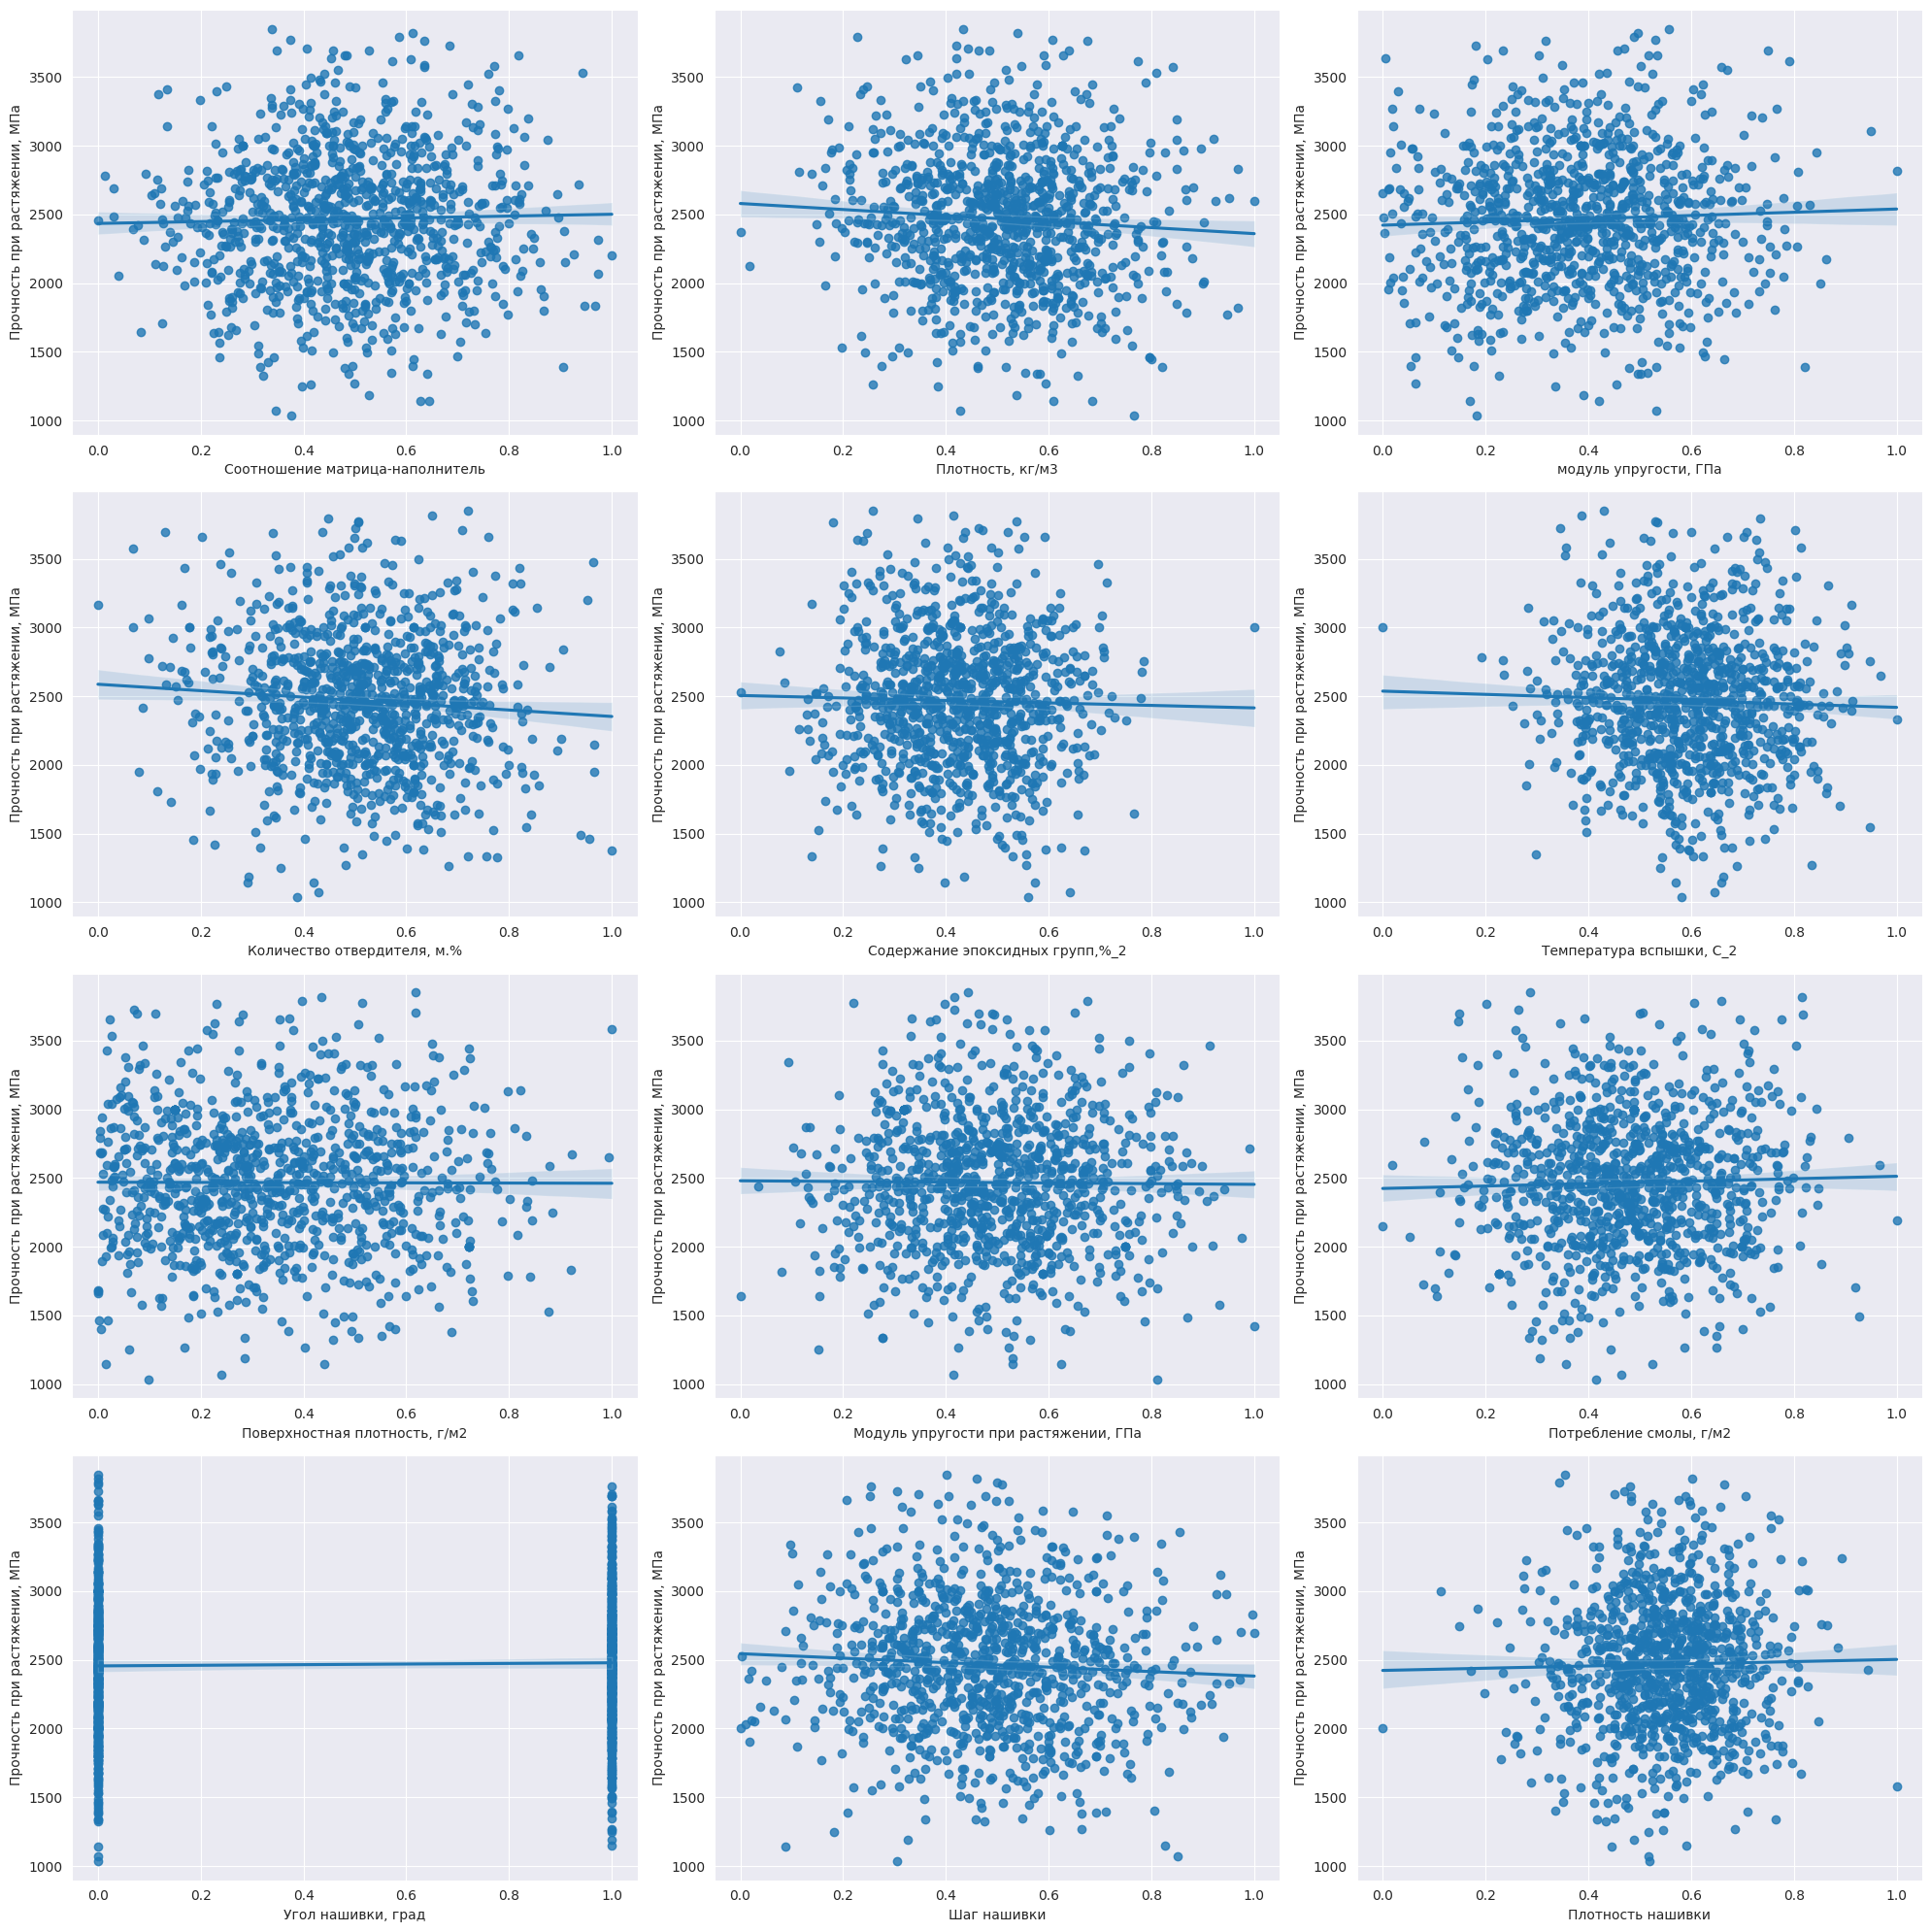

In [38]:
#@title Парные графики относительно - "Прочность при растяжении, МПа"
min_max_scaler = preprocessing.MinMaxScaler()

X_without_strength = ['Соотношение матрица-наполнитель',
                      'Плотность, кг/м3',
                      'модуль упругости, ГПа',
                      'Количество отвердителя, м.%',
                      'Содержание эпоксидных групп,%_2',
                      'Температура вспышки, С_2',
                      'Поверхностная плотность, г/м2',
                      'Модуль упругости при растяжении, ГПа',
                      'Потребление смолы, г/м2',
                      'Угол нашивки, град',
                      'Шаг нашивки',
                      'Плотность нашивки']

df_x = df.loc[:, X_without_strength]
df_y = df['Прочность при растяжении, МПа']

df_x_strength = pd.DataFrame(data = min_max_scaler.fit_transform(df_x),
                             columns = X_without_strength)

fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (20, 20))

index = 0
axs = axs.flatten()

for i, j in enumerate(X_without_strength):
    sns.regplot(x = df_x_strength[j], y = df_y, ax = axs[i])

plt.tight_layout(pad = 1.08, w_pad = 1.08)

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

X = np.array(df.drop('Модуль упругости при растяжении, ГПа', axis = 1))
y = np.array(df['Модуль упругости при растяжении, ГПа'])

y = y.reshape(-1, 1)

X_scaled = min_max_scaler.fit_transform(X)
y_scaled = min_max_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, 
                                                    test_size = 0.3, 
                                                    shuffle = True)

print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_test:', X_test.shape, 'y_test:', y_test.shape)

X_train: (716, 12) y_train: (716, 1)
X_test: (307, 12) y_test: (307, 1)


In [43]:
#@title Описательная статистика входных данных до предобработки
def show_statistics(s):
    return s.describe().loc[['min', 'max', 'mean', 'std'], :].T
show_statistics(pd.DataFrame(X))

min          max         mean         std
0      0.389403     5.591742     2.930366    0.913222
1   1731.764635  2207.773481  1975.734888   73.729231
2      2.436909  1911.536477   739.923233  330.231581
3     17.740275   198.953207   110.570769   28.295911
4     14.254985    33.000000    22.244390    2.406301
5    100.000000   413.273418   285.882151   40.943260
6      0.603740  1399.542362   482.731833  281.314690
7   1036.856605  3848.436732  2466.922843  485.628006
8     33.803026   414.590628   218.423144   59.735931
9      0.000000    90.000000    44.252199   45.015793
10     0.000000    14.440522     6.899222    2.563467
11     0.000000   103.988901    57.153929   12.350969

In [41]:
#@title Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(X_train))

min       max      mean       std
0   0.000000  1.000000  0.491232  0.175480
1   0.000000  0.951093  0.512050  0.154442
2   0.000000  1.000000  0.388318  0.177701
3   0.067654  1.000000  0.508423  0.157217
4   0.076869  1.000000  0.428520  0.131186
5   0.000000  0.969290  0.590372  0.131260
6   0.002499  1.000000  0.344304  0.199646
7   0.012188  1.000000  0.512458  0.171516
8   0.000000  1.000000  0.483849  0.161181
9   0.000000  1.000000  0.495810  0.500332
10  0.000000  1.000000  0.480320  0.179825
11  0.000000  1.000000  0.547839  0.116484

In [42]:
#@title Линейная регрессия ...
scores_map = {}

# Обычная линейная регрессия методом наименьших квадратов
l_regressor = LinearRegression()
l_regressor.fit(X_train, y_train)

y_pred = l_regressor.predict(X_test)

kf = KFold(n_splits=10)

scores = cross_val_score(l_regressor, X_scaled, y_scaled, cv = kf,
                         scoring='neg_mean_squared_error')


#y_pred = standard_scaler.inverse_transform(l_regressor.predict([X_test[10]]))
#
#l_regressor.predict(standard_scaler.transform(X_valid))

scores_map['LinearRegression'] = scores

print('Обычная линейная регрессия методом наименьших квадратов')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\n')

# Линейный метод наименьших квадратов с регуляризацией l2
l_ridge = linear_model.Ridge()
l_ridge.fit(X_train, y_train)

y_pred = l_ridge.predict(X_test)

scores = cross_val_score(l_ridge, X_scaled, y_scaled, cv = kf,
                         scoring='neg_mean_squared_error')

scores_map['Ridge'] = scores

print('Линейный метод наименьших квадратов с регуляризацией l2')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\n')

p_ridge = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
p_ridge.fit(X_train, y_train)

y_pred = p_ridge.predict(X_test)

scores = cross_val_score(p_ridge, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['PolyRidge'] = scores

print('PolyRidge')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Обычная линейная регрессия методом наименьших квадратов
MAE:  0.13666489759440442
MSE:  0.02908739116078578
RMSE:  0.17055025992588163


Линейный метод наименьших квадратов с регуляризацией l2
MAE:  0.1366185134688383
MSE:  0.029027008009458552
RMSE:  0.17037314345124513


PolyRidge
MAE:  0.13796223689214304
MSE:  0.029907383476985724
RMSE:  0.17293751321499257


In [44]:
#@title Regression based on k-nearest neighbors ...
knn = KNeighborsRegressor(n_neighbors = 5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

scores = cross_val_score(knn, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['KNeighborsRegressor'] = scores
print('Regression based on k-nearest neighbors ...')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Regression based on k-nearest neighbors ...
MAE:  0.14724219385107526
MSE:  0.03364575920137815
RMSE:  0.1834278037849719


In [45]:
#@title Дерево решений ...
desc_tr = DecisionTreeRegressor(max_depth = None)

desc_tr.fit(X_train, y_train)

y_pred = desc_tr.predict(X_test)

scores = cross_val_score(desc_tr, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['DecisionTreeRegressor'] = scores

print('Дерево решений ...')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Дерево решений ...
MAE:  0.18649207264692708
MSE:  0.05608941539732083
RMSE:  0.23683204047873427


In [46]:
#@title Gradient Boosting ...
gbr = GradientBoostingRegressor(alpha = 0.9, learning_rate = 0.1, max_depth = 2,
                                min_samples_leaf = 1, min_samples_split = 3,
                                n_estimators = 100, random_state = 30)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)


scores = cross_val_score(gbr, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['GradientBoostingRegressor'] = scores

print('Gradient Boosting ...')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Gradient Boosting ...
MAE:  0.14012237926803808
MSE:  0.03098879154840006
RMSE:  0.1760363358752961


<Axes: >

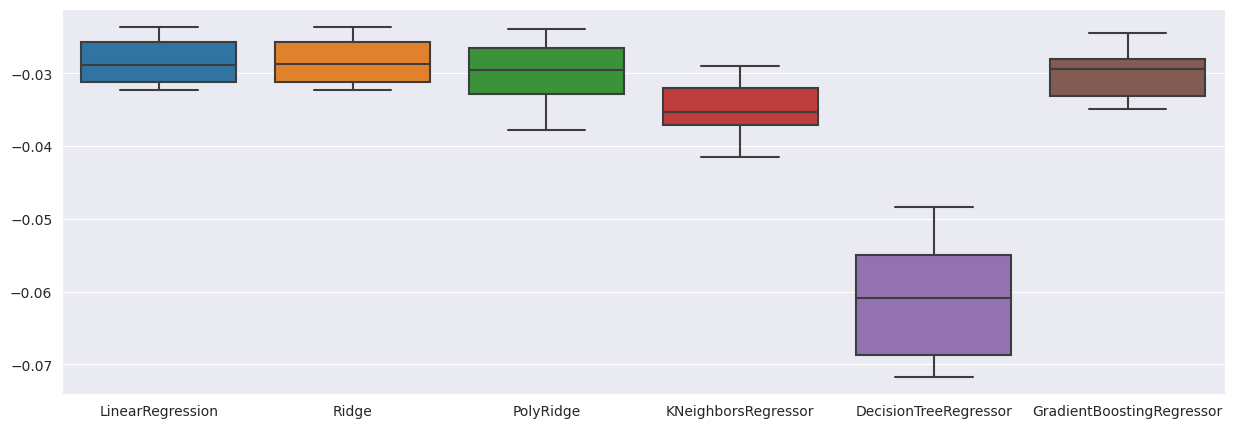

In [47]:
#@title Сравнение моделей с параметрами по умолчанию
plt.figure(figsize=(15, 5))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data = scores_map)

In [48]:
scores_map.style.highlight_max(axis = 0)

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

X = np.array(df.drop('Прочность при растяжении, МПа', axis = 1))
y = np.array(df['Прочность при растяжении, МПа'])

y = y.reshape(-1, 1)

X_scaled = min_max_scaler.fit_transform(X)
y_scaled = min_max_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, 
                                                    test_size = 0.3, 
                                                    shuffle = True)

print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_test:', X_test.shape, 'y_test:', y_test.shape)

X_train: (716, 12) y_train: (716, 1)
X_test: (307, 12) y_test: (307, 1)


In [50]:
#@title Описательная статистика входных данных до предобработки
def show_statistics(s):
    return s.describe().loc[['min', 'max', 'mean', 'std'], :].T
show_statistics(pd.DataFrame(X))

min          max         mean         std
0      0.389403     5.591742     2.930366    0.913222
1   1731.764635  2207.773481  1975.734888   73.729231
2      2.436909  1911.536477   739.923233  330.231581
3     17.740275   198.953207   110.570769   28.295911
4     14.254985    33.000000    22.244390    2.406301
5    100.000000   413.273418   285.882151   40.943260
6      0.603740  1399.542362   482.731833  281.314690
7     64.054061    82.682051    73.328571    3.118983
8     33.803026   414.590628   218.423144   59.735931
9      0.000000    90.000000    44.252199   45.015793
10     0.000000    14.440522     6.899222    2.563467
11     0.000000   103.988901    57.153929   12.350969

In [51]:
#@title Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(X_train))

min       max      mean       std
0   0.030369  1.000000  0.489522  0.173952
1   0.000000  1.000000  0.511234  0.157847
2   0.000000  1.000000  0.385499  0.177086
3   0.067412  1.000000  0.512705  0.154204
4   0.086779  0.784214  0.423693  0.129023
5   0.000000  0.947729  0.589689  0.128414
6   0.000000  1.000000  0.343934  0.203331
7   0.000000  0.976141  0.498152  0.165417
8   0.000000  1.000000  0.490441  0.156069
9   0.000000  1.000000  0.491620  0.500279
10  0.000000  1.000000  0.479130  0.182728
11  0.000000  1.000000  0.550367  0.119491

In [52]:
#@title Линейная регрессия ...
scores_map = {}

# Обычная линейная регрессия методом наименьших квадратов
l_regressor = LinearRegression()
l_regressor.fit(X_train, y_train)

y_pred = l_regressor.predict(X_test)

kf = KFold(n_splits=10)

scores = cross_val_score(l_regressor, X_scaled, y_scaled, cv = kf,
                         scoring='neg_mean_squared_error')


#y_pred = standard_scaler.inverse_transform(l_regressor.predict([X_test[10]]))
#
#l_regressor.predict(standard_scaler.transform(X_valid))

scores_map['LinearRegression'] = scores

print('Обычная линейная регрессия методом наименьших квадратов')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\n')

# Линейный метод наименьших квадратов с регуляризацией l2
l_ridge = linear_model.Ridge()
l_ridge.fit(X_train, y_train)

y_pred = l_ridge.predict(X_test)

scores = cross_val_score(l_ridge, X_scaled, y_scaled, cv = kf,
                         scoring='neg_mean_squared_error')

scores_map['Ridge'] = scores

print('Линейный метод наименьших квадратов с регуляризацией l2')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\n')

p_ridge = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
p_ridge.fit(X_train, y_train)

y_pred = p_ridge.predict(X_test)

scores = cross_val_score(p_ridge, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['PolyRidge'] = scores

print('PolyRidge')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Обычная линейная регрессия методом наименьших квадратов
MAE:  0.13391226644700002
MSE:  0.02885632573487506
RMSE:  0.16987149771187354


Линейный метод наименьших квадратов с регуляризацией l2
MAE:  0.13388009835522272
MSE:  0.028836642429095845
RMSE:  0.16981355195948244


PolyRidge
MAE:  0.13475365797211364
MSE:  0.029249450946975893
RMSE:  0.1710247085861452


In [53]:
#@title Regression based on k-nearest neighbors ...
knn = KNeighborsRegressor(n_neighbors = 5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

scores = cross_val_score(knn, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['KNeighborsRegressor'] = scores
print('Regression based on k-nearest neighbors ...')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Regression based on k-nearest neighbors ...
MAE:  0.1493119028764394
MSE:  0.03505090947482871
RMSE:  0.18721888119211885


In [54]:
#@title Дерево решений ...
desc_tr = DecisionTreeRegressor(max_depth = None)

desc_tr.fit(X_train, y_train)

y_pred = desc_tr.predict(X_test)

scores = cross_val_score(desc_tr, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['DecisionTreeRegressor'] = scores

print('Дерево решений ...')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Дерево решений ...
MAE:  0.20357761061179383
MSE:  0.06505547627844127
RMSE:  0.2550597504084901


In [55]:
#@title Gradient Boosting ...
gbr = GradientBoostingRegressor(alpha = 0.9, learning_rate = 0.1, max_depth = 2,
                                min_samples_leaf = 1, min_samples_split = 3,
                                n_estimators = 100, random_state = 30)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)


scores = cross_val_score(gbr, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['GradientBoostingRegressor'] = scores

print('Gradient Boosting ...')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Gradient Boosting ...
MAE:  0.13501052841602013
MSE:  0.02848202081035877
RMSE:  0.16876617199651942


<Axes: >

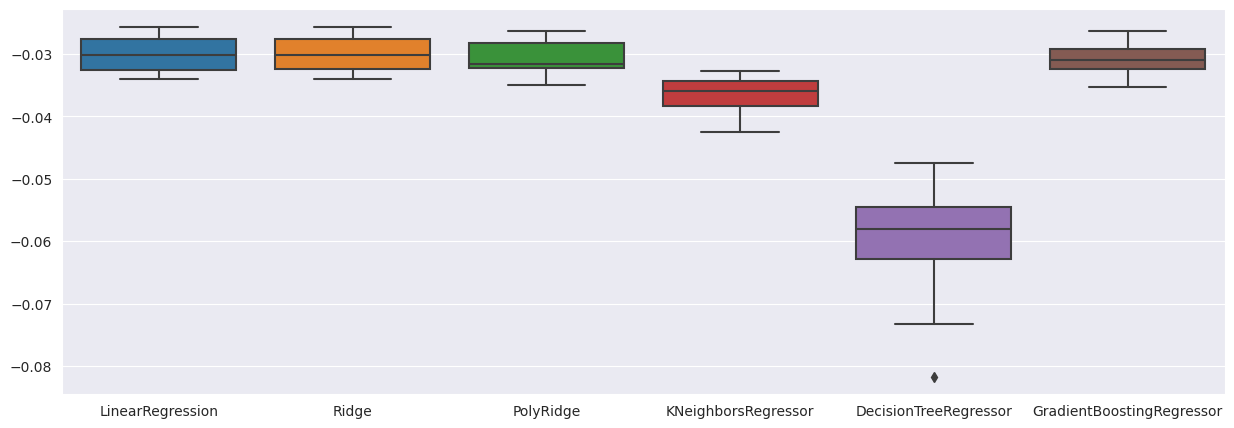

In [56]:
#@title Сравнение моделей с параметрами по умолчанию
plt.figure(figsize=(15, 5))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data = scores_map)
     

In [57]:
scores_map.style.highlight_max(axis = 0)

In [58]:
#@title Нейронная сеть, которая рекомендует соотношение матрица-наполнитель
import tensorflow as tf
from tensorflow import keras

from keras import Sequential
from keras.models import Model
from keras.layers import Input, Dense
from keras import utils
from keras.utils import np_utils
from keras.layers import BatchNormalization
from keras.layers import Dropout


from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

print(f'tensorflow ver: {tf.__version__}')

tensorflow ver: 2.12.0


In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

X = np.array(df.drop('Соотношение матрица-наполнитель', axis = 1))
y = np.array(df['Соотношение матрица-наполнитель'])

y = y.reshape(-1, 1)

X_scaled = min_max_scaler.fit_transform(X)
y_scaled = min_max_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, 
                                                    test_size = 0.3, 
                                                    shuffle = True)

In [60]:
print(X_scaled.shape, y_scaled.shape)
print(X_train.shape, y_train.shape)
print(y_test.shape, y_test.shape)

(1023, 12) (1023, 1)
(716, 12) (716, 1)
(307, 1) (307, 1)


In [61]:
#@title Фуекция собирающая НС
def construct_model():
    return tf.keras.Sequential([
    keras.layers.Input(shape=(12,)),                   
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1)                        
    ])
     

def compile_model(model):
    model.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.MeanAbsolutePercentageError(),
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model
     

#@title График ошибки
def plot_loss(history):
    fig, axes = plt.subplots(figsize=(15, 5))
    axes.plot(history['root_mean_squared_error'], label='loss')
    axes.plot(history['val_root_mean_squared_error'], label='val_loss')
    axes.set_xlabel('Эпоха')
    axes.set_ylabel('RMSE')
    axes.legend()
    axes.grid(True)
    plt.show()
     

#@title Сборка НС
model = construct_model()
     

#@title Компиляция НС
model = compile_model(model)
     

#@title Сводная информация по архитектуре сети
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4

In [62]:
%%time
#Обучение нейросети
history = model.fit(X_train, y_train, epochs = 100,
                    validation_split = 0.3, verbose = 1)

Epoch 1/100
16/16 [==============================] - 4s 22ms/step - loss: 1506990.7500 - root_mean_squared_error: 0.3256 - val_loss: 45.2307 - val_root_mean_squared_error: 0.2006
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 488549.9375 - root_mean_squared_error: 0.2610 - val_loss: 59.8017 - val_root_mean_squared_error: 0.3322
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 542647.8125 - root_mean_squared_error: 0.3031 - val_loss: 64.8197 - val_root_mean_squared_error: 0.3562
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 689619.3125 - root_mean_squared_error: 0.2706 - val_loss: 56.8780 - val_root_mean_squared_error: 0.3151
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 491691.2500 - root_mean_squared_error: 0.2783 - val_loss: 64.4619 - val_root_mean_squared_error: 0.3567
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 489022.3750 - root_mean_squared_error: 0

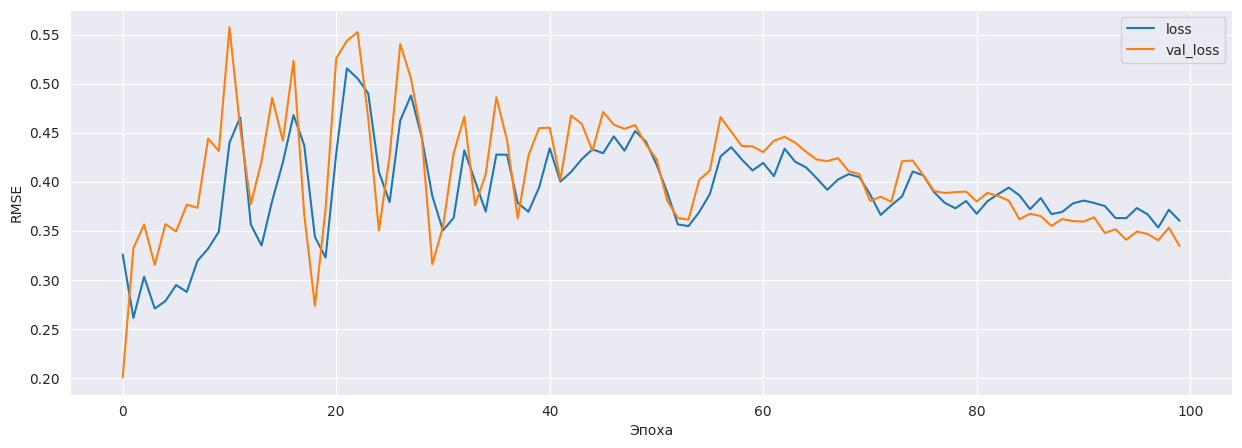

In [63]:
plot_loss(history.history)

In [64]:
# Проверяем точность нейросети на тестовых данных
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 9ms/step - loss: 55.9665 - root_mean_squared_error: 0.3291


[55.96651077270508, 0.3290804922580719]

In [65]:
# Предсказание 
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 3ms/step


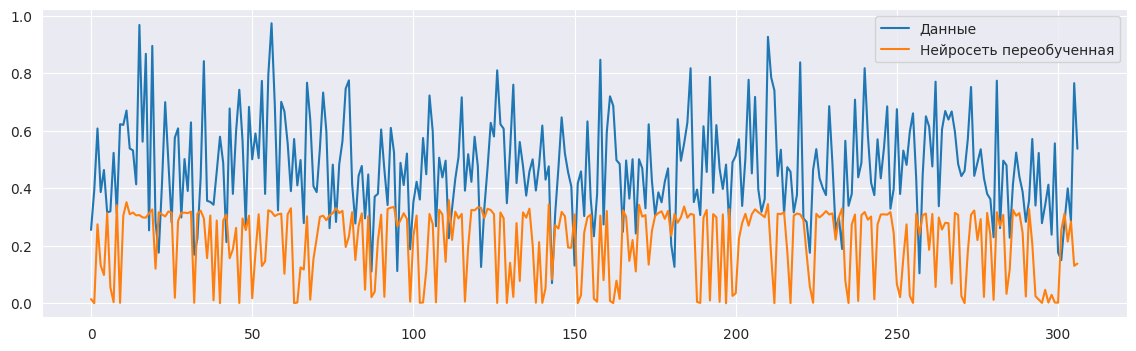

In [66]:
# Визуализация
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y_test, label='Данные')
ax.plot(y_pred, label='Нейросеть переобученная')
ax.legend()
plt.show()

In [69]:
#@title Сохраняем модель
pickle.dump(model, open('model.pkl', 'wb'))

!ls

model.pkl	  X_bp1.csv  X_bp.xlsxdata3_cleaned.xlsx  X_nup.xlsx
sample_data	  X_bp.csv   X_bp.xlsxdata4_std.xlsx
scaler_df.joblin  X_bp.xlsx  X_nup.csv


In [71]:
x,y = df4.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа',
                'Соотношение матрица-наполнитель'], axis=1), df4['Модуль упругости при растяжении, ГПа']
print('Размерность x: {}, размерность y: {}'.format(x.shape, y.shape))

Размерность x: (999, 10), размерность y: (999,)


In [72]:
y1 = df4['Модуль упругости при растяжении, ГПа']
x1 = x 

y2 = df4['Прочность при растяжении, МПа']
x2 = x 

y3 = df4['Соотношение матрица-наполнитель']
x3 = x 

from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=1)
print('x1_train:', x1_train.shape, 'y1_train:', y1_train.shape)
print('x1_test:', x1_test.shape, 'y1_test:', y1_test.shape)

x1_train: (699, 10) y1_train: (699,)
x1_test: (300, 10) y1_test: (300,)


In [73]:
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error 
 
RANDOM_STATE = 18

In [74]:
models_bas = pd.DataFrame()

models = pd.DataFrame()

reg_lin1 = ElasticNet(random_state=RANDOM_STATE)
cv = KFold(n_splits=10) # схема для кросс-валидации

for scor in ['r2','neg_mean_squared_error', 'neg_mean_absolute_error']:
    cv_score = cross_val_score(reg_lin1,
                           x1_train, y1_train, scoring=scor, 
                           cv=cv, n_jobs=-1) 
    print('%s на кросс-валидации: %.3f+-%.3f'% (scor, abs(np.mean(cv_score)), 
                                                np.std(cv_score)))

r2 на кросс-валидации: 0.017+-0.022
neg_mean_squared_error на кросс-валидации: 1.029+-0.215
neg_mean_absolute_error на кросс-валидации: 0.813+-0.091


In [75]:
# результаты модели reg_lin1 с базовыми параметрами на тестовой выборке
reg_lin1.fit(x1_train, y1_train)
print('R2 модели на тестовой выборке: %.3f' % r2_score(y1_test, reg_lin1.predict(x1_test)))
print('MSE модели на тестовой выборке: %.3f' % mean_squared_error(y1_test, reg_lin1.predict(x1_test)))
print('MAE на тестовой выборке: %.3f' % mean_absolute_error(y1_test, reg_lin1.predict(x1_test)))

R2 модели на тестовой выборке: -0.000
MSE модели на тестовой выборке: 0.939
MAE на тестовой выборке: 0.781


In [76]:
models_bas = pd.concat([models_bas, pd.DataFrame({
   'Model': 'ElasticNet', 
   'MAE': mean_absolute_error(y1_test, reg_lin1.predict(x1_test)), 
   'MSE': mean_squared_error(y1_test, reg_lin1.predict(x1_test)),
   'R2 score': reg_lin1.score(x1_test, y1_test)},
    index=['Модуль упругости при растяжении'])])
# Подбираем гиперпараметры модели с помощью GridSearchCV, количество блоков равно 10
params = {'alpha': (0.1, 0.5, 1), 
          'l1_ratio': (0.1, 0.5, 0.9)}
for scor in ['r2','neg_mean_squared_error', 'neg_mean_absolute_error']:
    model_grid = GridSearchCV(reg_lin1, param_grid=params,
                              scoring=scor, 
                              n_jobs=-1, cv=cv)
    # Оцениваем работу модели с подобранными параметрами
    model_grid.fit(x1_train, y1_train)
    print('Лучшая модель на кросс-валидации с параметрами {} и {}: {}'.format(model_grid.best_params_, 
            scor, abs(model_grid.best_score_)))
    best_model = model_grid.best_estimator_

Лучшая модель на кросс-валидации с параметрами {'alpha': 0.5, 'l1_ratio': 0.5} и r2: 0.017023131606938847
Лучшая модель на кросс-валидации с параметрами {'alpha': 0.5, 'l1_ratio': 0.5} и neg_mean_squared_error: 1.0293154729632634
Лучшая модель на кросс-валидации с параметрами {'alpha': 0.5, 'l1_ratio': 0.5} и neg_mean_absolute_error: 0.8132350581245452


In [77]:
# результаты модели reg_lin1 после подбора гиперпараметров на тестовой выборке
print('R2 модели на тестовой выборке: %.3f' % r2_score(y1_test, best_model.predict(x1_test)))
print('MSE модели на тестовой выборке: %.3f' % mean_squared_error(y1_test, best_model.predict(x1_test)))
print('MAE на тестовой выборке: %.3f' % mean_absolute_error(y1_test, best_model.predict(x1_test)))

R2 модели на тестовой выборке: -0.000
MSE модели на тестовой выборке: 0.939
MAE на тестовой выборке: 0.781


In [78]:
models = pd.concat([models, pd.DataFrame({
   'Model': 'ElasticNet', 
   'MAE': mean_absolute_error(y1_test, best_model.predict(x1_test)), 
   'MSE': mean_squared_error(y1_test, best_model.predict(x1_test)),
   'R2 score': best_model.score(x1_test, y1_test)},
    index=['Модуль упругости при растяжении'])])

In [79]:
# Строим модель KNeighborsRegressor с базовыми параметрами
KNR1 = KNeighborsRegressor()
cv = KFold(n_splits=10) # схема для кросс-валидации

for scor in ['r2','neg_mean_squared_error', 'neg_mean_absolute_error']:
    cv_score = cross_val_score(KNR1,
                           x1_train, y1_train, scoring=scor, 
                           cv=cv, n_jobs=-1) # прогоняем модель на кросс-валидации
   
    print('%s на кросс-валидации: %.3f+-%.3f'% (scor, abs(np.mean(cv_score)), 
                                                np.std(cv_score)))

r2 на кросс-валидации: 0.241+-0.138
neg_mean_squared_error на кросс-валидации: 1.237+-0.206
neg_mean_absolute_error на кросс-валидации: 0.881+-0.093


In [80]:
# результаты модели KNR1 с базовыми параметрами на тестовой выборке
KNR1.fit(x1_train, y1_train)
print('R2 модели на тестовой выборке: %.3f' % r2_score(y1_test, KNR1.predict(x1_test)))
print('MSE модели на тестовой выборке: %.3f' % mean_squared_error(y1_test, KNR1.predict(x1_test)))
print('MAE на тестовой выборке: %.3f' % mean_absolute_error(y1_test, KNR1.predict(x1_test)))

R2 модели на тестовой выборке: -0.263
MSE модели на тестовой выборке: 1.186
MAE на тестовой выборке: 0.880


In [81]:
models_bas = pd.concat([models_bas, pd.DataFrame({
   'Model': 'KNeighborsRegressor', 
   'MAE': mean_absolute_error(y1_test, KNR1.predict(x1_test)), 
   'MSE': mean_squared_error(y1_test, KNR1.predict(x1_test)),
   'R2 score': KNR1.score(x1_test, y1_test)},
    index=['Модуль упругости при растяжении'])])
# Подбираем гиперпараметры модели с помощью GridSearchCV
KNR1_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
for scor in ['r2','neg_mean_squared_error', 'neg_mean_absolute_error']:
    model_grid_KNR1 = GridSearchCV(KNR1, 
                          param_grid=KNR1_params, 
                          scoring=scor, 
                          n_jobs=-1, cv=cv)
    # Оцениваем работу модели с подобранными параметрами
    model_grid_KNR1.fit(x1_train, y1_train)
    print('Лучшая модель на кросс-валидации с параметрами {} и {}: {}'.format(model_grid_KNR1.best_params_, 
            scor, abs(model_grid_KNR1.best_score_)))
    best_model_KNR1 = model_grid_KNR1.best_estimator_

Лучшая модель на кросс-валидации с параметрами {'algorithm': 'auto', 'n_neighbors': 287, 'weights': 'uniform'} и r2: 0.011871249786116833
Лучшая модель на кросс-валидации с параметрами {'algorithm': 'auto', 'n_neighbors': 287, 'weights': 'uniform'} и neg_mean_squared_error: 1.023748370858699
Лучшая модель на кросс-валидации с параметрами {'algorithm': 'auto', 'n_neighbors': 169, 'weights': 'uniform'} и neg_mean_absolute_error: 0.8106710963818955


In [82]:
# результаты модели KNR1 после подбора гиперпараметров на тестовой выборке
print('R2 модели на тестовой выборке: %.3f' % r2_score(y1_test, best_model_KNR1.predict(x1_test)))
print('MSE модели на тестовой выборке: %.3f' % mean_squared_error(y1_test, best_model_KNR1.predict(x1_test)))
print('MAE на тестовой выборке: %.3f' % mean_absolute_error(y1_test, best_model_KNR1.predict(x1_test)))

R2 модели на тестовой выборке: 0.003
MSE модели на тестовой выборке: 0.936
MAE на тестовой выборке: 0.780


In [83]:
models = pd.concat([models, pd.DataFrame({'Model': 'KNeighborsRegressor', 
   'MAE': mean_absolute_error(y1_test, best_model_KNR1.predict(x1_test)), 
   'MSE': mean_squared_error(y1_test, best_model_KNR1.predict(x1_test)),
   'R2 score': best_model_KNR1.score(x1_test, y1_test)},
    index=['Модуль упругости при растяжении'])])
# Строим модель SVR с базовыми параметрами
svr1 = SVR()
cv = KFold(n_splits=10)
for scor in ['r2','neg_mean_squared_error', 'neg_mean_absolute_error']:
    cv_score = cross_val_score(svr1,
                           x1_train, y1_train, scoring=scor, 
                           cv=cv, n_jobs=-1) # прогоняем модель на кросс-валидации
    print('%s на кросс-валидации: %.3f+-%.3f'% (scor, abs(np.mean(cv_score)), 
                                                np.std(cv_score)))

r2 на кросс-валидации: 0.123+-0.130
neg_mean_squared_error на кросс-валидации: 1.130+-0.234
neg_mean_absolute_error на кросс-валидации: 0.845+-0.109


In [ ]:
# результаты модели svr1 с базовыми параметрами на тестовой выборке
svr1.fit(x1_train, y1_train)
print('R2 модели на тестовой выборке: %.3f' % r2_score(y1_test, svr1.predict(x1_test)))
print('MSE модели на тестовой выборке: %.3f' % mean_squared_error(y1_test, svr1.predict(x1_test)))
print('MAE на тестовой выборке: %.3f' % mean_absolute_error(y1_test, svr1.predict(x1_test)))

In [85]:
models_bas = pd.concat([models_bas, pd.DataFrame({
   'Model': 'SVR', 
   'MAE': mean_absolute_error(y1_test, svr1.predict(x1_test)), 
   'MSE': mean_squared_error(y1_test, svr1.predict(x1_test)),
   'R2 score': svr1.score(x1_test, y1_test)},
    index=['Модуль упругости при растяжении'])])
# Подбираем гиперпараметры модели с помощью GridSearchCV
svr1_params = [{'kernel': ['linear'],'C': [0.001, 0.01, 0.02]}, {'kernel': ['poly'],'C':
                            [0.001, 0.01, 0.02]}, {'kernel': ['rbf'],'gamma':
                            ['scale', 'auto'], 'C': [0.01, 0.05, 0.1, 0.2, 0.3]},
                            {'kernel': ['sigmoid'], 'C': [0.001, 0.01, 0.1]}]
for scor in ['r2','neg_mean_squared_error', 'neg_mean_absolute_error']:
    model_grid_svr1 = GridSearchCV(svr1, 
                          param_grid=svr1_params, 
                          scoring=scor, 
                          n_jobs=-1, cv=cv)
    # Оцениваем работу модели с подобранными параметрами
    model_grid_svr1.fit(x1_train, y1_train)
    print('Лучшая модель на кросс-валидации с параметрами {} и {}: {}'.format(model_grid_svr1.best_params_, 
            scor, abs(model_grid_svr1.best_score_)))
    best_model_svr1 = model_grid_svr1.best_estimator_

Лучшая модель на кросс-валидации с параметрами {'C': 0.01, 'kernel': 'poly'} и r2: 0.015701970129056008
Лучшая модель на кросс-валидации с параметрами {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'} и neg_mean_squared_error: 1.0278875522340625
Лучшая модель на кросс-валидации с параметрами {'C': 0.05, 'gamma': 'auto', 'kernel': 'rbf'} и neg_mean_absolute_error: 0.8116519816978702


In [86]:
# результаты модели svr1 после подбора гиперпараметров на тестовой выборке
print('R2 модели на тестовой выборке: %.3f' % r2_score(y1_test, best_model_svr1.predict(x1_test)))
print('MSE модели на тестовой выборке: %.3f' % mean_squared_error(y1_test, best_model_svr1.predict(x1_test)))
print('MAE на тестовой выборке: %.3f' % mean_absolute_error(y1_test, best_model_svr1.predict(x1_test)))

R2 модели на тестовой выборке: 0.006
MSE модели на тестовой выборке: 0.934
MAE на тестовой выборке: 0.779


In [87]:
models = pd.concat([models, pd.DataFrame({'Model': 'SVR', 
   'MAE': mean_absolute_error(y1_test, best_model_svr1.predict(x1_test)), 
   'MSE': mean_squared_error(y1_test, best_model_svr1.predict(x1_test)),
   'R2 score': best_model_svr1.score(x1_test, y1_test)},
    index=['Модуль упругости при растяжении'])])
# Строим модель RandomForestRegressor с базовыми параметрами
rfr1 = RandomForestRegressor()
cv = KFold(n_splits=10)
for scor in ['r2','neg_mean_squared_error', 'neg_mean_absolute_error']:
    cv_score = cross_val_score(rfr1, x1_train, y1_train, scoring=scor, 
                           cv=cv, n_jobs=-1) # прогоняем модель на кросс-валидации
    print('%s на кросс-валидации: %.3f+-%.3f'% (scor, abs(np.mean(cv_score)), 
                                                np.std(cv_score)))

r2 на кросс-валидации: 0.082+-0.058
neg_mean_squared_error на кросс-валидации: 1.076+-0.222
neg_mean_absolute_error на кросс-валидации: 0.825+-0.095


In [88]:
# результаты модели rfr1 с базовыми параметрами на тестовой выборке
rfr1.fit(x1_train, y1_train)
print('R2 модели на тестовой выборке: %.3f' % r2_score(y1_test, rfr1.predict(x1_test)))
print('MSE модели на тестовой выборке: %.3f' % mean_squared_error(y1_test, rfr1.predict(x1_test)))
print('MAE на тестовой выборке: %.3f' % mean_absolute_error(y1_test, rfr1.predict(x1_test)))

R2 модели на тестовой выборке: -0.070
MSE модели на тестовой выборке: 1.005
MAE на тестовой выборке: 0.809


In [90]:
models_bas = pd.concat([models_bas, pd.DataFrame({
   'Model': 'RandomForestRegressor', 
   'MAE': mean_absolute_error(y1_test, rfr1.predict(x1_test)), 
   'MSE': mean_squared_error(y1_test, rfr1.predict(x1_test)),
   'R2 score': rfr1.score(x1_test, y1_test)},
    index=['Модуль упругости при растяжении'])])
# Подбираем гиперпараметры модели с помощью GridSearchCV
rfr1_params = {'n_estimators': range(10, 50, 10),
               'max_features': range(1, 11, 1),'max_depth': range(1, 2, 3),
               'min_samples_split': range(20, 50, 5),
               'min_samples_leaf': range(2, 6),'bootstrap': ['True', 'False']}

for scor in ['r2','neg_mean_squared_error', 'neg_mean_absolute_error']:
    model_grid_rfr1 = GridSearchCV(rfr1, 
                          param_grid=rfr1_params, 
                          scoring=scor, 
                          n_jobs=-1, cv=cv)
    # Оцениваем работу модели с подобранными параметрами
    model_grid_rfr1.fit(x1_train, y1_train)
    print('Лучшая модель на кросс-валидации с параметрами {} и {}: {}'.format(model_grid_rfr1.best_params_, 
            scor, abs(model_grid_rfr1.best_score_)))
    best_model_rfr1 = model_grid_rfr1.best_estimator_

ValueError: ignored

In [ ]:
# результаты модели rfr1 после подбора гиперпараметров на тестовой выборке
print('R2 модели на тестовой выборке: %.3f' % r2_score(y1_test, best_model_rfr1.predict(x1_test)))
print('MSE модели на тестовой выборке: %.3f' % mean_squared_error(y1_test, best_model_rfr1.predict(x1_test)))
print('MAE на тестовой выборке: %.3f' % mean_absolute_error(y1_test, best_model_rfr1.predict(x1_test)))

In [ ]:
models = pd.concat([models, pd.DataFrame({'Model': 'RandomForestRegressor', 
   'MAE': mean_absolute_error(y1_test, best_model_rfr1.predict(x1_test)), 
   'MSE': mean_squared_error(y1_test, best_model_rfr1.predict(x1_test)),
   'R2 score': best_model_rfr1.score(x1_test, y1_test)},
    index=['Модуль упругости при растяжении'])])

In [ ]:
# Строим модели для прогноза прочности при растяжении
# Линейная регрессия

# Разбиваем данные для модели 2 на обучающую и тестовую выборки
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, 
                                                        random_state=RANDOM_STATE)
print('x2_train:', x2_train.shape, 'y2_train:', y2_train.shape)
print('x2_test:', x2_test.shape, 'y2_test:', y2_test.shape)

# Строим модель линейной регрессии с базовыми параметрами
reg_lin2 = ElasticNet(random_state=RANDOM_STATE)
cv = KFold(n_splits=10) # схема для кросс-валидации
for scor in ['r2','neg_mean_squared_error', 'neg_mean_absolute_error']:
    cv_score = cross_val_score(reg_lin2, x2_train, y2_train, scoring=scor, 
                           cv=cv, n_jobs=-1) # прогоняем модель на кросс-валидации
    print('%s на кросс-валидации: %.3f+-%.3f'% (scor, abs(np.mean(cv_score)), 
                                                np.std(cv_score)))

# результаты модели reg_lin2 с базовыми параметрами на тестовой выборке
reg_lin2.fit(x2_train, y2_train)
print('R2 модели на тестовой выборке: %.3f' % r2_score(y2_test, reg_lin2.predict(x2_test)))
print('MSE модели на тестовой выборке: %.3f' % mean_squared_error(y2_test, reg_lin2.predict(x2_test)))
print('MAE на тестовой выборке: %.3f' % mean_absolute_error(y2_test, reg_lin2.predict(x2_test)))

models_bas = pd.concat([models_bas, pd.DataFrame({
   'Model': 'ElasticNet', 
   'MAE': mean_absolute_error(y2_test, reg_lin2.predict(x2_test)), 
   'MSE': mean_squared_error(y2_test, reg_lin2.predict(x2_test)),
   'R2 score': reg_lin1.score(x2_test, y2_test)},
    index=['Прочность при растяжении'])])
# Подбираем гиперпараметры модели с помощью GridSearchCV, количество блоков равно 10
params = {'alpha': (0.1, 0.5, 1), 
          'l1_ratio': (0.1, 0.5, 0.9)}
for scor in ['r2','neg_mean_squared_error', 'neg_mean_absolute_error']:
    model_grid_reg_lin2 = GridSearchCV(reg_lin2, param_grid=params,
                              scoring=scor, 
                              n_jobs=-1, cv=cv)
    # Оцениваем работу модели с подобранными параметрами
    model_grid_reg_lin2.fit(x2_train, y2_train)
    print('Лучшая модель на кросс-валидации с параметрами {} и {}: {}'.format(model_grid_reg_lin2.best_params_, 
            scor, abs(model_grid_reg_lin2.best_score_)))
    best_model_reg_lin2 = model_grid.best_estimator_
